In [0]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil

import wfdb

In [0]:
!pip install wfdb

In [4]:
# Demo 1 - Read a wfdb record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
record = wfdb.rdrecord('ORIGIN/A00001') 
wfdb.plot_wfdb(record=record, title='Record a103l from Physionet Challenge 2015') 
display(record.__dict__)

FileNotFoundError: ignored

In [0]:
import os
cwd = os.getcwd()
dl_dir = os.path.join(cwd, 'tmp_dl_dir')

In [0]:
# Demo 2 - Read certain channels and sections of the WFDB record using the simplified 'rdsamp' function
# which returns a numpy array and a dictionary. Show the data.
signals, fields = wfdb.rdsamp('ORIGIN/A00001', channels=[0], sampfrom=100, sampto=2700)
display(signals)
display(fields)


array([[-0.153],
       [-0.154],
       [-0.155],
       ...,
       [-0.049],
       [-0.048],
       [-0.045]])

{'fs': 300,
 'sig_len': 2600,
 'n_sig': 1,
 'base_date': datetime.date(2000, 5, 1),
 'base_time': datetime.time(5, 5, 15, 333333),
 'units': ['mV'],
 'sig_name': ['ECG'],
 'comments': []}

In [0]:
# Can also read the same files hosted on Physiobank 
signals2, fields2 = wfdb.rdsamp('s0010_re', channels=[14, 0, 5, 10], sampfrom=100, sampto=15000, pb_dir='ptbdb/patient001/')
display(signals2)
display(fields2)

array([[ 0.0335, -0.167 , -0.237 ,  0.1165],
       [ 0.0355, -0.1615, -0.2395,  0.119 ],
       [ 0.0385, -0.168 , -0.2465,  0.116 ],
       ...,
       [-0.0445,  0.008 ,  0.033 ,  0.045 ],
       [-0.044 ,  0.0175,  0.042 ,  0.052 ],
       [-0.044 ,  0.0245,  0.0365,  0.05  ]])

{'fs': 1000,
 'sig_len': 14900,
 'n_sig': 4,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV', 'mV', 'mV'],
 'sig_name': ['vz', 'i', 'avf', 'v5'],
 'comments': ['age: 81',
  'sex: female',
  'ECG date: 01/10/1990',
  'Diagnose:',
  'Reason for admission: Myocardial infarction',
  'Acute infarction (localization): infero-latera',
  'Former infarction (localization): no',
  'Additional diagnoses: Diabetes mellitus',
  'Smoker: no',
  'Number of coronary vessels involved: 1',
  'Infarction date (acute): 29-Sep-90',
  'Previous infarction (1) date: n/a',
  'Previous infarction (2) date: n/a',
  'Hemodynamics:',
  'Catheterization date: 16-Oct-90',
  'Ventriculography: Akinesia inferior wall',
  'Chest X-ray: Heart size upper limit of norm',
  'Peripheral blood Pressure (syst/diast):  140/80 mmHg',
  'Pulmonary artery pressure (at rest) (syst/diast): n/a',
  'Pulmonary artery pressure (at rest) (mean): n/a',
  'Pulmonary capillary wedge pressure (at rest): n/a',
  'Cardiac outp

In [0]:
record = wfdb.rdheader('ORIGIN/A00001')
display(record.__dict__)

{'record_name': 'A00001',
 'n_sig': 1,
 'fs': 300,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 9000,
 'base_time': datetime.time(5, 5, 15),
 'base_date': datetime.date(2000, 5, 1),
 'comments': [],
 'sig_name': ['ECG'],
 'p_signal': None,
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['A00001.mat'],
 'fmt': ['16'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [24],
 'adc_gain': [1000.0],
 'baseline': [0],
 'units': ['mV'],
 'adc_res': [16],
 'adc_zero': [0],
 'init_value': [-127],
 'checksum': [0],
 'block_size': [0],
 'base_datetime': datetime.datetime(2000, 5, 1, 5, 5, 15)}

In [0]:
record2 = wfdb.rdheader('drive02', pb_dir='drivedb')

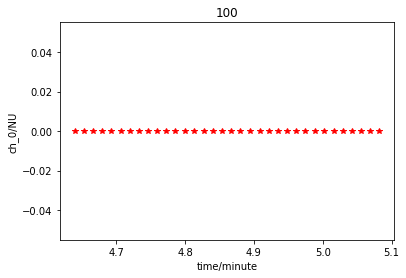

In [0]:
# Demo 4 - Read part of a WFDB annotation file into a wfdb.Annotation object, and plot the samples

# Can also read the same file hosted on PhysioBank 
annotation2 = wfdb.rdann('100', 'atr', sampfrom=100000, sampto=110000, pb_dir='mitdb')
annotation2.fs = 360
wfdb.plot_wfdb(annotation=annotation2, time_units='minutes')

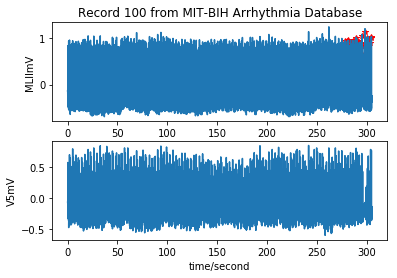

In [0]:
# Demo 5 - Read a WFDB record and annotation. Plot all channels, and the annotation on top of channel 0.
record = wfdb.rdrecord('100', sampto = 110000, pb_dir='mitdb')
annotation = wfdb.rdann('100', 'atr', sampfrom=100000, sampto=110000, pb_dir='mitdb')

wfdb.plot_wfdb(record=record, annotation=annotation,
               title='Record 100 from MIT-BIH Arrhythmia Database',
               time_units='seconds')

In [0]:
# Demo 16 - List the Physiobank Databases

dbs = wfdb.get_dbs()
display(dbs)

[['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database [sample excluded record]'],
 ['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['apnea-ecg', 'Apnea-ECG Database'],
 ['chfdb', 'BIDMC Congestive Heart Failure Database'],
 ['bidmc', 'BIDMC PPG and Respiration Dataset'],
 ['bpssrat', 'Blood Pressure in Salt-Sensitive Dahl Rats'],
 ['capslpdb', 'CAP Sleep Database'],
 ['crisdb', 'CAST RR Interval Sub-Study Database'],
 ['cves', 'Cerebral Vasoregulation in Elderly with Stroke'],
 ['challenge/2009/test-set-a', 'Challenge 2009 Test Set A'],
 ['challenge/2009/test-set-b', 'Challenge 2009 Test Set B'],
 ['challenge/2010/set-a', 'Challenge 2010 Training Set A'],
 ['challenge/2010/set-b', 'Challenge 2010 Test Set B'],
 ['challenge/2010/set-c', 'Challenge 2010 Test Set C'],
 ['challenge/2011/sim', 'Challenge 2011 Pilot Set'],
 ['challenge/2011/set-a', 'Challenge 2011 Training Set A'],
 ['challenge/2011/set-b', 'Chall

In [0]:
# Demo 17 - Download all the WFDB records and annotations from a small Physiobank Database

# Make a temporary download directory in your current working directory
cwd = os.getcwd()
dl_dir = os.path.join(cwd, 'tmp_dl_dir')

# Download all the WFDB content
wfdb.dl_database('ahadb', dl_dir=dl_dir)

# Display the downloaded content in the folder
display(os.listdir(dl_dir))

# Cleanup: delete the downloaded directory
# shutil.rmtree(dl_dir)

ConnectionError: HTTPConnectionPool(host='physionet.org', port=8080): Max retries exceeded with url: /physiobank/database/ahadb/ (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x04C16490>: Failed to establish a new connection: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера'))

In [0]:

python -m wget -r -np http://physionet.org/physiobank/database/mitdb/

SyntaxError: invalid syntax (<ipython-input-46-cab6bb61d058>, line 2)

In [0]:
!pip install wget

  Running setup.py bdist_wheel for wget: started
  Running setup.py bdist_wheel for wget: finished with status 'done'
  Stored in directory: C:\Users\BulatN\AppData\Local\pip\Cache\wheels\40\15\30\7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
